# Support Vector Machine (SVM)

Support Vector Machines (SVMs) are supervised learning models used primarily for classification tasks. They work by finding a hyperplane (decision boundary) that best separates the data into classes. The key idea is to maximize the margin—the distance between the hyperplane and the closest data points from each class.

## Overview

- **Goal:** Find the optimal linear decision boundary that separates the classes.
- **Key Principle:** Maximize the margin between the classes.
- **Advantages:** Robust to overfitting, especially in high-dimensional spaces.
- **Applications:** Text classification, image recognition, bioinformatics, etc.

## Intuition

Imagine you have two classes of points in a 2D space. An SVM looks for the line (or hyperplane in higher dimensions) that not only separates these classes but also stays as far away as possible from the nearest points of both classes. These closest points are called *support vectors*, and they directly influence the position and orientation of the hyperplane.

## Mathematical Formulation

Given a set of training examples \((\mathbf{x}_i, y_i)\) where \(\mathbf{x}_i \in \mathbb{R}^n\) and \(y_i \in \{-1, +1\}\), the goal is to find the weight vector \(\mathbf{w}\) and bias \(b\) such that the decision function:

$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b
$$

correctly classifies the data. The ideal hyperplane satisfies:

$$
y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 \quad \forall i
$$

and the optimization problem is formulated as:

$$
\min_{\mathbf{w}, b} \quad \frac{1}{2} \|\mathbf{w}\|^2
$$

subject to the constraints above. Minimizing \(\frac{1}{2} \|\mathbf{w}\|^2\) maximizes the margin between the classes.

## Hinge Loss

In practice, especially when data are not perfectly linearly separable, SVMs use the hinge loss to penalize misclassified points and those that fall within the margin:

$$
\text{Loss} = \max(0, 1 - y_i (\mathbf{w}^\top \mathbf{x}_i + b))
$$

This loss function ensures that only points violating the margin (or misclassified) contribute to the loss, allowing the model some flexibility with noisy or overlapping data.

## Regularization

To prevent overfitting and control model complexity, a regularization term is added. The regularized optimization problem becomes:

$$
\min_{\mathbf{w}, b} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{N} \max(0, 1 - y_i (\mathbf{w}^\top \mathbf{x}_i + b))
$$

Here, \(C\) is a hyperparameter that controls the trade-off between maximizing the margin and minimizing the classification error.

In [3]:
import numpy as np

In [4]:
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init the weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx) 


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
 )

In [18]:
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [22]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

1.0


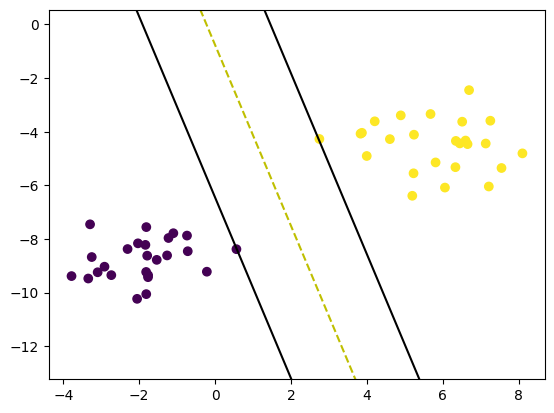

In [23]:
print(accuracy(y_test, predictions))
visualize_svm()